In [1]:
library(GLMsData)
library(statmod)
library(MASS)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(grazing)

In [3]:
str(grazing)

'data.frame':	62 obs. of  3 variables:
 $ When  : Factor w/ 2 levels "After","Before": 2 2 2 2 2 2 2 2 2 2 ...
 $ Grazed: Factor w/ 2 levels "Feral","Reference": 1 1 1 1 1 1 1 1 1 1 ...
 $ Birds : int  2 0 0 1 4 2 3 0 1 0 ...


In [4]:
grazing

When,Grazed,Birds
Before,Feral,2
Before,Feral,0
Before,Feral,0
Before,Feral,1
Before,Feral,4
Before,Feral,2
Before,Feral,3
Before,Feral,0
Before,Feral,1
Before,Feral,0


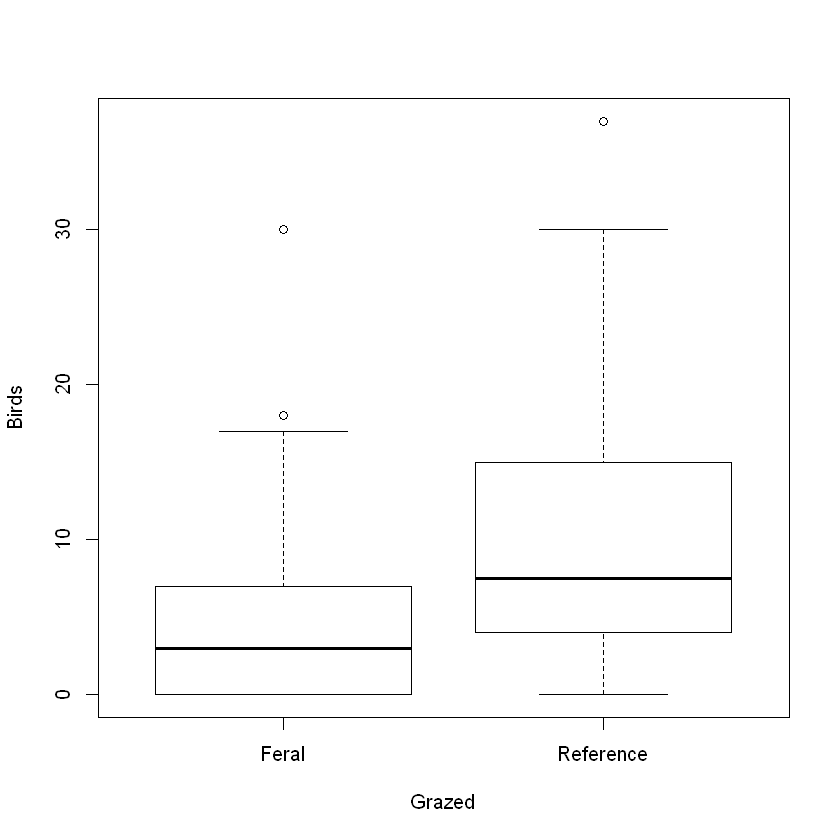

In [6]:

plot(Birds ~ Grazed, data=grazing)


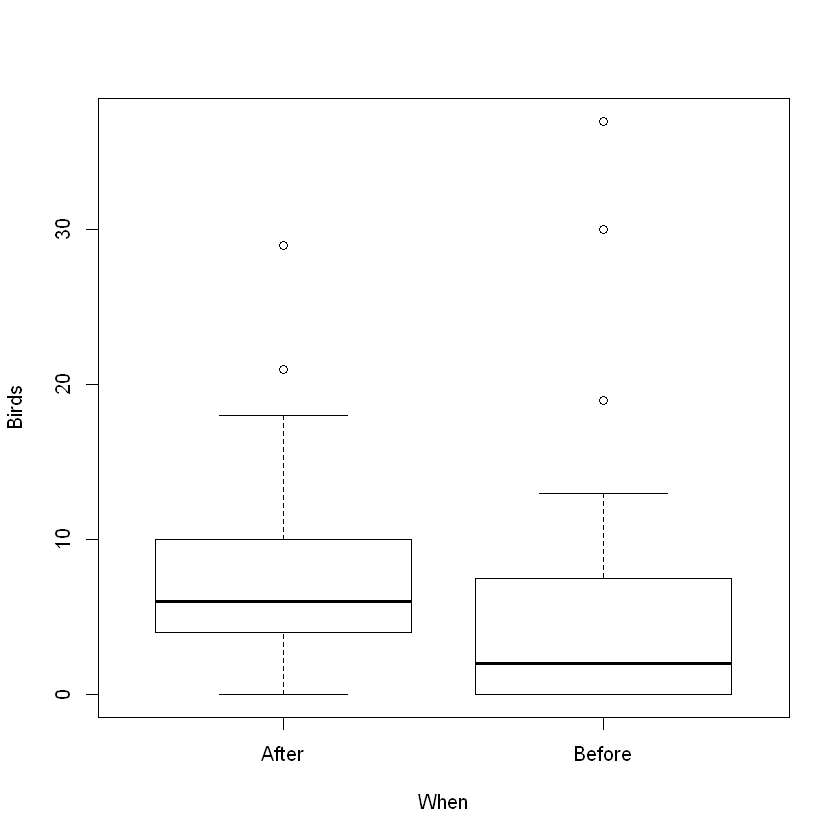

In [7]:
plot(Birds ~ When, data=grazing)

In [8]:
glm.1 <- glm(Birds ~ When * Grazed, data=grazing, family = poisson(link="log"))

In [9]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.8562980,0.08838835,21.001614,6.339445e-98
WhenBefore,-0.6776430,0.15230567,-4.449230,8.617854e-06
GrazedReference,0.4462871,0.13001311,3.432632,5.977539e-04
WhenBefore:GrazedReference,0.8213497,0.20040444,4.098461,4.159070e-05


In [10]:
anova(glm.1, test="F")

Warning message in anova.glm(glm.1, test = "F"):
"using F test with a 'poisson' family is inappropriate"

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,61,528.0727,NA,NA
When,1,4.930359,60,523.1423,4.930359,2.638883e-02
Grazed,1,68.677619,59,454.4647,68.677619,1.159494e-16
When:Grazed,1,17.236589,58,437.2281,17.236589,3.300188e-05


In [13]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev/df.residual(glm.1)
gof.pearson/df.residual(glm.1)

[1] 1.390467e-59

[1] 2.223206e-84

[1] 7.538416

[1] 9.754976

In [14]:
group.mean <- with( grazing, tapply(Birds, list(When, Grazed), "var" ))
group.var <- with(grazing, tapply(Birds, list(When, Grazed), "mean"))

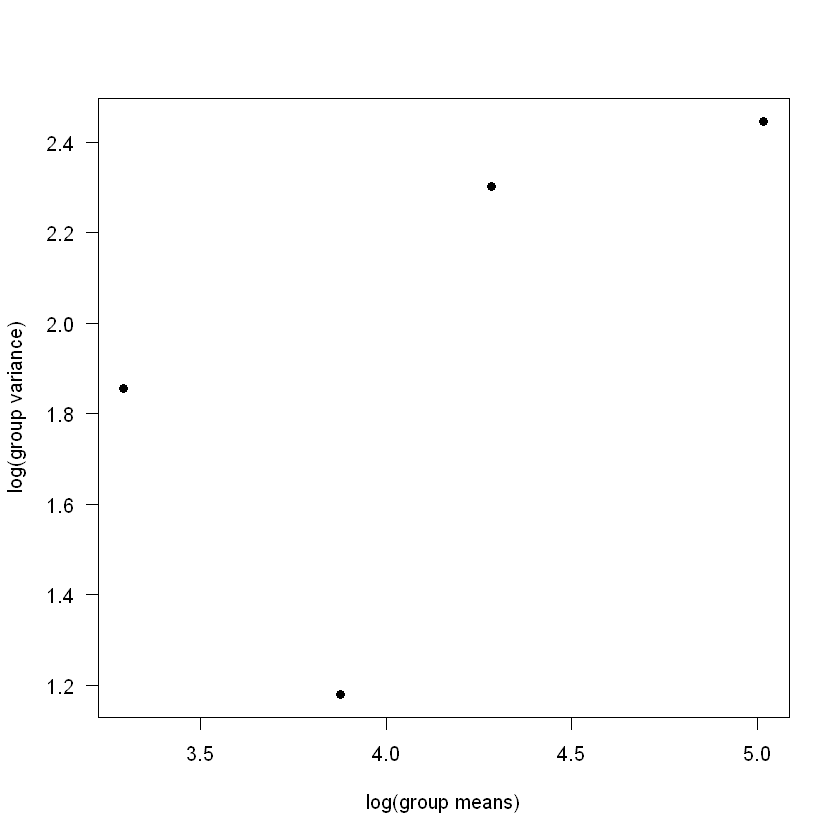

In [16]:
plot( log(group.var) ~ log(group.mean), las=1, pch=19,
xlab="log(group means)", ylab="log(group variance)")

In [17]:
mf.lm <- lm( c(log(group.var)) ~ c(log(group.mean)) )
coef(mf.lm)

(Intercept) c(log(group.mean)) 
       -0.06769347         0.48891831

In [18]:
glm.quasi <- glm(Birds ~ When * Grazed, data=grazing, family = quasipoisson(link="log"))

In [19]:
coef(summary(glm.quasi))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.8562980,0.2760629,6.724184,8.504507e-09
WhenBefore,-0.6776430,0.4756956,-1.424531,1.596515e-01
GrazedReference,0.4462871,0.4060694,1.099041,2.762912e-01
WhenBefore:GrazedReference,0.8213497,0.6259223,1.312223,1.946145e-01


In [20]:
anova(glm.quasi, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,61,528.0727,NA,NA
When,1,4.930359,60,523.1423,0.5054199,0.4799776
Grazed,1,68.677619,59,454.4647,7.0402653,0.0102657
When:Grazed,1,17.236589,58,437.2281,1.7669535,0.1889647


In [21]:
gof.dev <- deviance(glm.quasi)
gof.pearson <- sum(glm.quasi$weights * glm.quasi$residuals^2)

pchisq(gof.dev, df=df.residual(glm.quasi), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.quasi), lower.tail = FALSE)

gof.dev/df.residual(glm.quasi)
gof.pearson/df.residual(glm.quasi)

[1] 1.390467e-59

[1] 2.223206e-84

[1] 7.538416

[1] 9.754976


	Shapiro-Wilk normality test

data:  qresid(glm.quasi)
W = 0.9138, p-value = 0.0003466


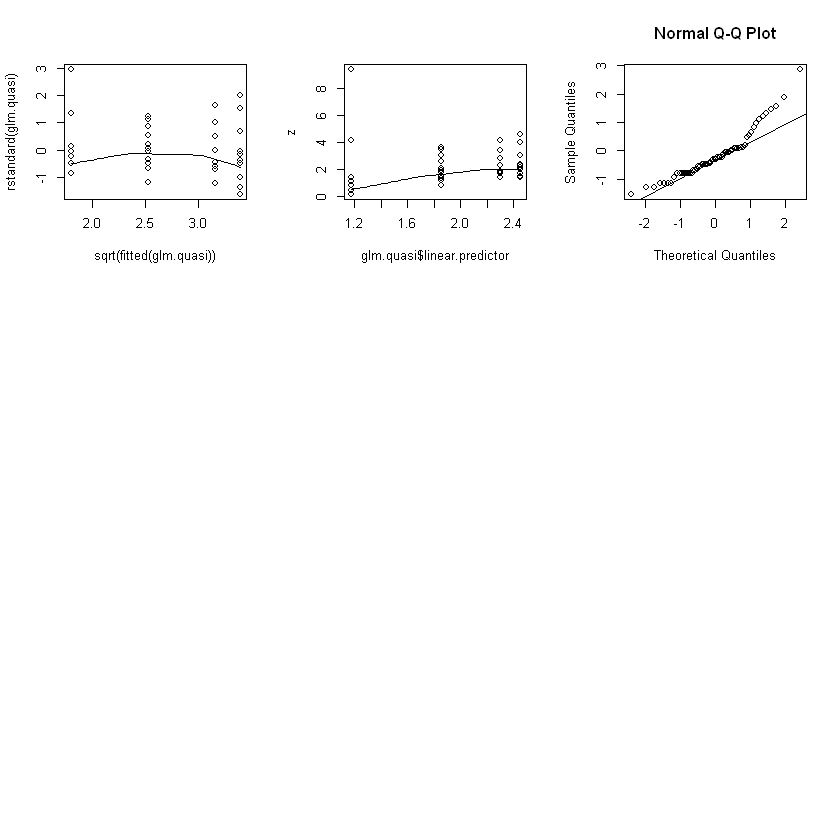

In [23]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.quasi) ~ sqrt(fitted(glm.quasi)))
z <- resid(glm.quasi, type="working") + glm.quasi$linear.predictor
scatter.smooth(z ~ glm.quasi$linear.predictor)
qqnorm(qresid(glm.quasi))
qqline(qresid(glm.quasi))
shapiro.test(qresid(glm.quasi))

In [24]:
glm.negbi <- glm.nb(Birds ~ When * Grazed, data=grazing)
glm.negbi <- glm.convert(glm.negbi)

In [25]:
coef(summary(glm.negbi))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.8562980,0.3076973,6.0328698,1.202963e-07
WhenBefore,-0.6776430,0.4477524,-1.5134325,1.356004e-01
GrazedReference,0.4462871,0.5092196,0.8764139,3.844206e-01
WhenBefore:GrazedReference,0.8213497,0.7266002,1.1304011,2.629602e-01


In [26]:
anova(glm.negbi, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,61,82.36657,NA,NA
When,1,0.5586739,60,81.80790,0.3801915,0.53991354
Grazed,1,8.5648478,59,73.24305,5.8285921,0.01894388
When:Grazed,1,1.8668798,58,71.37617,1.2704581,0.26432236


In [27]:
gof.dev <- deviance(glm.negbi)
gof.pearson <- sum(glm.negbi$weights * glm.negbi$residuals^2)

pchisq(gof.dev, df=df.residual(glm.negbi), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.negbi), lower.tail = FALSE)

gof.dev / df.residual(glm.negbi)
gof.pearson / df.residual(glm.negbi)

[1] 0.1115355

[1] 0.01146875

[1] 1.230624

[1] 1.469454


	Shapiro-Wilk normality test

data:  qresid(glm.negbi)
W = 0.97789, p-value = 0.3251


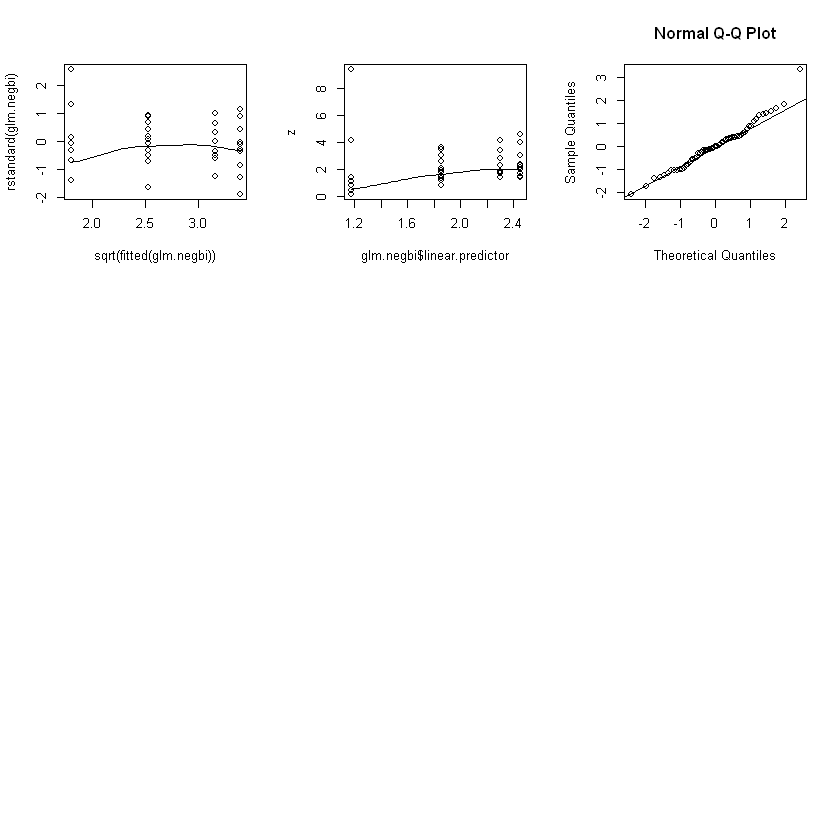

In [28]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.negbi) ~ sqrt(fitted(glm.negbi)))
z <- resid(glm.negbi, type="working") + glm.negbi$linear.predictor
scatter.smooth(z ~ glm.negbi$linear.predictor)
qqnorm(qresid(glm.negbi))
qqline(qresid(glm.negbi))
shapiro.test(qresid(glm.negbi))

In [29]:
extractAIC(glm.1)
extractAIC(glm.quasi)
extractAIC(glm.negbi)

[1]   4.0000 624.6599

[1]  4 NA

[1]   4.000 370.124